<a href="https://colab.research.google.com/github/NasrinAsadi/opencv/blob/main/Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import some prerequisites

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import time
import math

Run this cell for plotting

In [2]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''

    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

# PART 4

In [3]:
def eq_hist(h):
    sum_img=0
    sum_img = h.sum()
    #print(sum_img)
    ####### your code ########
    out_image_hist = np.zeros((256), np.int32)
    out_image_hist[0]= h[0]
    L = 256

    for hi,hv in enumerate(h[1:]):
      out_image_hist[hi]= out_image_hist[hi-1]+hv

    out_image_hist =  (L-1)/sum_img * out_image_hist
    return out_image_hist

In [4]:
def histogram_equalization(image):
    '''
    Equalizes the histogram of the input image.

    Parameters:
        image (numpy.ndarray): The input image.

    Returns:
        numpy.ndarray: The result image that it's histogram be eqaulized.
    '''

    h = compute_histogram(image)
    out_image = image.copy()

    out_image_hist= eq_hist(h)

    for i in range(image.shape[0]):
      for j in range(image.shape[1]):
        out_image[i,j] = out_image_hist[out_image[i,j]]
    ##########################

    return out_image

In [5]:
def compute_histogram(image):
    '''
    Computes histogram of the input image.

    Parameters:
        image (numpy.ndarray): The input image.

    Returns:
        numpy.ndarray: The numpy array of numbers in histogram.
    '''

    histogram = np.zeros((256), np.int32)

    ####### your code ########

    for i in range(image.shape[0]):
      for j in range(image.shape[1]):
        histogram[image[i,j]]= histogram[image[i,j]]+1

    ##########################

    return histogram

In [6]:
def find_nearest(array, value):
  # array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [7]:
def histogram_matching(img, ref_img):
    '''
    Matchs the histogram of the input image to the histogram of reference image.

    Parameters:
        img (numpy.ndarray): The input image.
        ref_img (numpy.ndarray): The reference image.

    Returns:
        numpy.ndarray: The result image.
    '''

    out_img = img.copy()
    hist_image= compute_histogram(img)
    eq_hist_image = eq_hist(hist_image)
    hist_ref = compute_histogram(ref_img)
    eq_hist_ref = eq_hist(hist_ref)
    ####### your code ########
    #en_img = np.zeros_like(img)
    tran_hist = np.zeros_like(eq_hist_image)
    for i in range(len(eq_hist_image)):
        tran_hist[i] = find_nearest(eq_hist_ref, eq_hist_image[i])

    for i in range(img.shape[0]):
      for j in range (img.shape[1]):

          out_img[i,j] = tran_hist[img[i,j]]

    ##########################

    return out_img

In [8]:
img = cv2.imread('Q4.jpg', cv2.IMREAD_GRAYSCALE)
ref_img = cv2.imread('Q4_ref.jpg', cv2.IMREAD_GRAYSCALE)
output = histogram_matching(img,ref_img)
h_img = compute_histogram(img)
h_ref_img = compute_histogram(ref_img)
h_out = compute_histogram(output)
image_list = []
image_list.append([img, 'input_image', 'img'])
image_list.append([ref_img, 'ref_image', 'img'])
image_list.append([output, 'result', 'img'])
image_list.append([h_img, 'img_hist', 'hist'])
image_list.append([h_ref_img, 'ref_img_hist', 'hist'])
image_list.append([h_out, 'res_hist', 'hist'])
plotter(image_list, 2, 3, True, 20, 10, 'q4')

AttributeError: ignored

# PART 5

In [24]:
def guassian_func(std, x, y, ee, pii):
  s = ee**((-(x**2)+ y**2)/2* std**2)
  t = 1/(2*pii)*s
  return t

In [29]:
def gaussian_filter(size, std):
    '''
    Creates the Guassian kernel with given size and std.

    Parameters:
        size (int): The size of the kernel. It must be odd.
        std (float): The standard deviation of the kernel.

    Returns:
        numpy.ndarray: The Guassina kernel.
    '''
    ee= math.e
    pii=math.pi
    kernel = np.zeros((size,size), np.float32)
    sum=0
    ####### your code ########
    for i in range(size):
      for j in range(size):

        kernel[i,j]= guassian_func(std, i-((size-1)/2), j-((size-1)/2), ee,pii)
        sum = sum+ kernel[i,j]

    kernel = (1.0 / sum)*kernel

    ##########################

    return kernel

Use the OpenCV Gaussian Blur function to filter image.

In [18]:
def opencv_filter(img, size, std):
    '''
    Applys the OpenCV's guassian blur function on input image.

    Parameters:
        img (numpy.ndarray): The input image.

    Returns:
        numpy.ndarray: The result image.
    '''

    out = None
    kernel = np.zeros((size,size), np.float32)
    ####### your code ########
    #dst = cv2.GaussianBlur(src,(10,10),cv2.BORDER_DEFAULT)
    out = cv2.GaussianBlur(img, (size,size), std)

    ##########################

    return out

Test your implementation (dont change this cell)

time for applying your guassian filter: 0.000785 s
time for applying OpenCV guassian filter: 0.004616 s


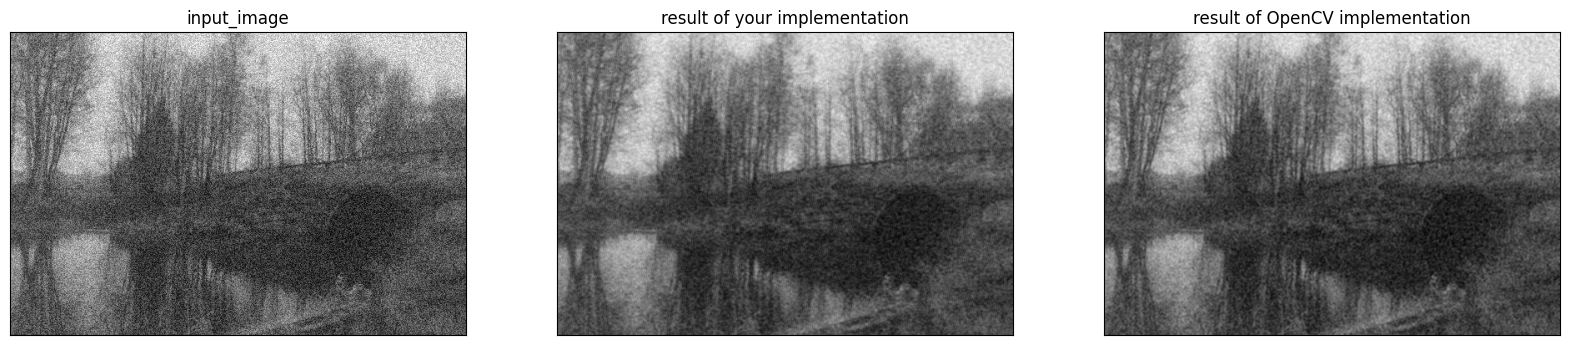

In [32]:
img = cv2.imread('img5.jpg', cv2.IMREAD_GRAYSCALE)
size = 3
std = 1
t1 = time.time()
kernel = gaussian_filter(size, std)
out_y_imp = cv2.filter2D(img, -1, kernel)
t2 = time.time()
out_ocv_imp = opencv_filter(img,size, std)
t3 = time.time()
print('time for applying your guassian filter: %f s' % (t2 - t1))
print('time for applying OpenCV guassian filter: %f s' % (t3 - t2))
image_list = []
image_list.append([img, 'input_image', 'img'])
image_list.append([out_y_imp, 'result of your implementation', 'img'])
image_list.append([out_ocv_imp, 'result of OpenCV implementation', 'img'])
plotter(image_list, 1, 3, True, 20, 10, 'q5')

In [33]:
!python notebook_converter.py

python3: can't open file '/content/notebook_converter.py': [Errno 2] No such file or directory
